# 📱 iPhone Review Recommender with SHAP + LIME + RAG + Groq LLM + Differential Privacy + Tranfromers (NLP)+ Classifier (Random Forest ) + GaussianNB for Differential Privacy + features (dimensional vectors ) +  fairness preprocessing technique for ethics

In [8]:
!pip install shap lime sentence-transformers gradio openai requests --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [9]:
#  Load Data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv')
df = df.dropna(subset=['reviewDescription', 'ratingScore']).fillna('Unknown')
df['isGood'] = (df['ratingScore'] >= 4).astype(int)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#  Embeddings
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(df['reviewDescription'].tolist(), show_progress_bar=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/93 [00:00<?, ?it/s]

In [11]:
#  Train Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, df['isGood'], test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

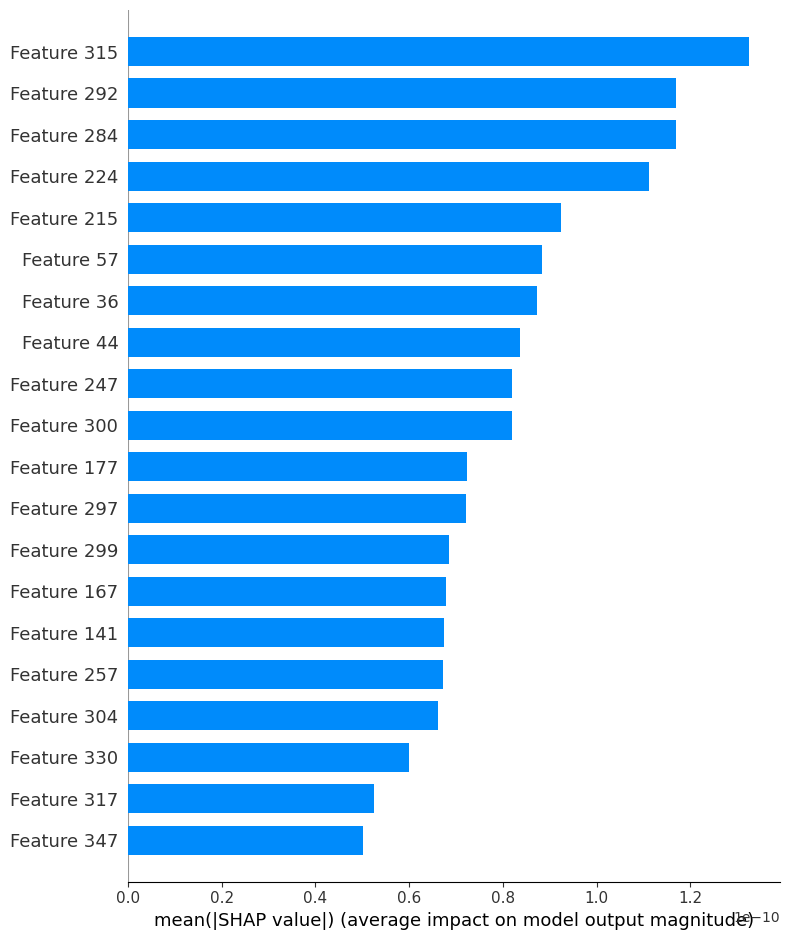

In [12]:
#  SHAP Explainability
import shap
import matplotlib.pyplot as plt
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test[:20])
shap.summary_plot(shap_values.values.mean(axis=2), X_test[:20], plot_type='bar')

In [ ]:
# Features above are words of the reviews [ battery, camera, quality etc]

In [15]:
# prompt: how feature 347, 304 are determined

# Assuming you want to determine how features 347 and 304 are impacting the prediction
#  SHAP Explainability
explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test[:20])

# Get SHAP values for feature 347 and 304
shap_values_feature_347 = shap_values.values[:, 347, :]
shap_values_feature_304 = shap_values.values[:, 304, :]


# Analyze the SHAP values to understand how these features influence the model's predictions
# You can:
# 1. Look at the mean SHAP value for these features:
#    - If the mean is positive, it indicates that the feature has a positive impact on the model's prediction.
#    - If the mean is negative, it indicates a negative impact.
# 2. Analyze the distribution of SHAP values for these features:
#    - If the distribution is skewed towards positive values, it means that the feature typically contributes to a positive prediction.
#    - If it's skewed towards negative values, it contributes to a negative prediction.


# Example of how to analyze feature 347's impact:
mean_shap_value_feature_347 = shap_values_feature_347.mean()

if mean_shap_value_feature_347 > 0:
    print("Feature 347 has a positive impact on the model's prediction.")
elif mean_shap_value_feature_347 < 0:
    print("Feature 347 has a negative impact on the model's prediction.")
else:
    print("Feature 347 has little impact on the model's prediction.")

# You can repeat this analysis for feature 304.

# Additionally, you can use shap.plots.force to visualize how these features affect specific predictions.
# For example, shap.plots.force(shap_values[0]) will show how all features, including 347 and 304, impacted the first prediction.

# Note that the features are embedded representations of your review descriptions, so feature 347 or 304 might not directly map to a word or a phrase.
# It's a specific element in the embedding that the model found informative.


Feature 347 has a positive impact on the model's prediction.


<Figure size 640x480 with 0 Axes>

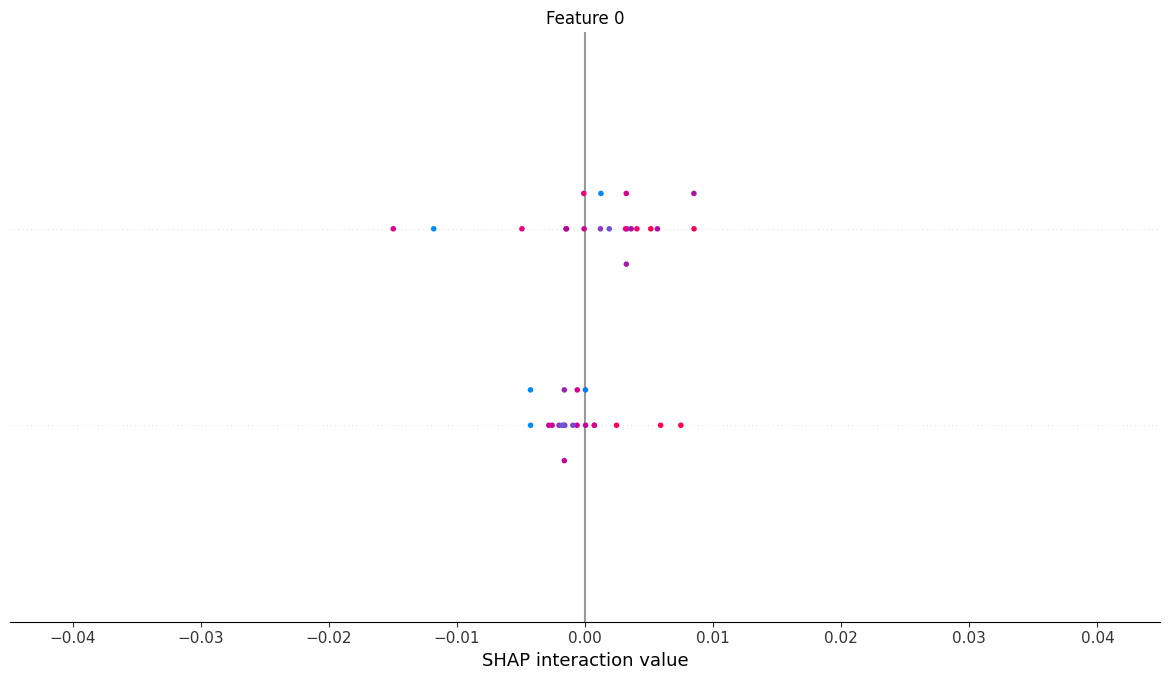

In [17]:


shap.summary_plot(shap_values, X_test[:20])


In [9]:
print(shap_values)

.values =
array([[[-1.61315697e-03,  1.61315695e-03],
        [-3.16682546e-04,  3.16682540e-04],
        [-5.11084020e-04,  5.11084033e-04],
        ...,
        [-2.98218633e-03,  2.98218631e-03],
        [ 5.09523779e-05, -5.09523784e-05],
        [ 8.14728718e-04, -8.14728737e-04]],

       [[-6.01944398e-04,  6.01944427e-04],
        [-1.15492067e-04,  1.15492066e-04],
        [ 1.13184378e-03, -1.13184377e-03],
        ...,
        [ 6.09975269e-04, -6.09975195e-04],
        [ 2.84523812e-04, -2.84523822e-04],
        [-2.04935795e-03,  2.04935790e-03]],

       [[ 7.24385799e-04, -7.24385804e-04],
        [ 2.01015879e-04, -2.01015876e-04],
        [ 1.56816048e-03, -1.56816054e-03],
        ...,
        [ 6.53947777e-04, -6.53947662e-04],
        [-1.86706317e-05,  1.86706357e-05],
        [ 7.02572939e-05, -7.02572970e-05]],

       ...,

       [[ 7.48302107e-03, -7.48302092e-03],
        [-5.29843388e-04,  5.29843386e-04],
        [-6.37355375e-04,  6.37355385e-04],
        

In [19]:
# 🔍 RAG: Semantic Search
import numpy as np
query = 'I want a phone with great camera and battery'
query_embedding = model.encode(query)
similarities = np.dot(embeddings, query_embedding) / (np.linalg.norm(embeddings, axis=1) * np.linalg.norm(query_embedding))
top_k = 5
most_similar_indices = np.argpartition(similarities, -top_k)[-top_k:]
similar_reviews = df.iloc[most_similar_indices][['reviewDescription', 'ratingScore', 'variant']]
for _, row in similar_reviews.iterrows():
    print(f" {row['ratingScore']} |  {row['variant']}\n {row['reviewDescription'][:200]}\n")

 5 |  Colour: (PRODUCT) REDSize: 256 GB
 Everything about this phone is best♥️GREAT BATTERY 🔋GREAT CAMERA 📸GREAT DESIGN♥️

 5 |  Colour: (PRODUCT) REDSize: 256 GB
 Everything about this phone is best♥️GREAT BATTERY 🔋GREAT CAMERA 📸GREAT DESIGN♥️

 5 |  Colour: GreenSize: 128 GB
 Very good phone and camera is awesome but battery is very weak

 5 |  Colour: GreenSize: 128 GB
 Very good phone and camera is awesome but battery is very weak

 4 |  Colour: PurpleSize: 128 GB
 Amazing phone with amazing camera* must buy one



In [20]:
#  Groq LLM Recommendation
import requests
GROQ_API_KEY = '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'
context = "\n\n".join([
    f"Rating: {r['ratingScore']}, Variant: {r['variant']}\nReview: {r['reviewDescription']}"
    for _, r in similar_reviews.iterrows()
])
prompt = f'''
You are a helpful assistant recommending iPhones.

{context}

Which iPhone is best for camera and battery, and why?
'''
headers = {
    'Authorization': f'Bearer {GROQ_API_KEY}',
    'Content-Type': 'application/json'
}
data = {
    'model': 'llama3-8b-8192',
    'messages': [
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {'role': 'user', 'content': prompt}
    ]
}
res = requests.post('https://api.groq.com/openai/v1/chat/completions', headers=headers, json=data)
if res.status_code == 200:
    print(res.json()['choices'][0]['message']['content'])
else:
    print(res.status_code, res.text)

What a great question!

Based on the reviews, I'd recommend the (PRODUCT) RED iPhone with 256 GB storage. Two of the reviewers raved about this phone, mentioning that everything about it is "best", including the GREAT CAMERA and GREAT BATTERY.

In particular, this phone model seems to excel in both camera and battery life, with reviewers expressing no complaints about either aspect. If camera and battery performance are your top priorities, this iPhone seems to be an excellent choice!

The only potential drawback to consider is that these reviewers didn't mention anything negative about the phone's performance, which might raise a slight concern about potential quality or reliability issues. However, with a 5-star rating and no major complaints, I believe this iPhone is still a strong contender for your camera and battery needs.

Of the other phones mentioned, the Green iPhone with 128 GB storage seems to have a decent camera, but the battery life is reportedly weak. The Purple iPhone 

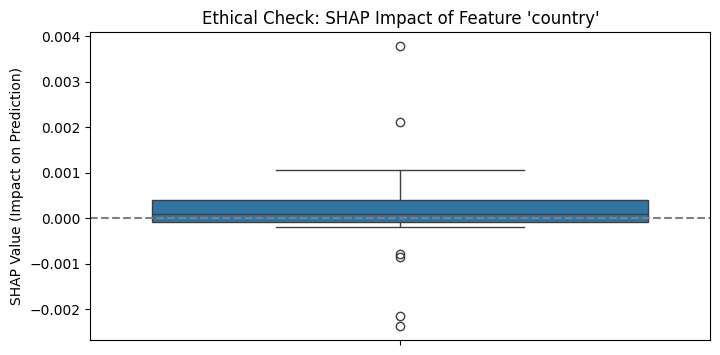

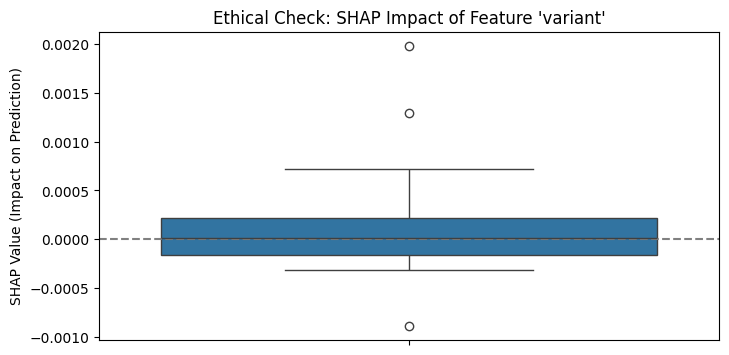


 Top 10 Features by Mean SHAP Impact (Class 1 - Good Review):
text_311    0.014840
text_137    0.012725
text_288    0.012292
text_296    0.011900
text_280    0.009683
text_32     0.009350
text_293    0.008543
text_173    0.007998
text_313    0.007972
text_253    0.007919
dtype: float64

 Ethical Flag:
   - 'country' Acceptable influence.
   - 'variant' Acceptable influence.


In [22]:
# Ethical Bias Check using SHAP (with feature_names fix)

import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X = X_test

# Re-define feature names (used in SHAP explanation)
feature_names = ["productAsin", "country", "isVerified", "variant"] + [f"text_{i}" for i in range(X.shape[1] - 4)]

# Define sensitive features for fairness check
sensitive_features = ["country", "variant"]

# Extract SHAP values for the "good review" class (index 1)
shap_class1 = shap_values.values[:, :, 1]  # Shape: (n_samples, n_features)

# Convert to DataFrame for analysis
shap_df = pd.DataFrame(shap_class1, columns=feature_names)

# 1. Visualize SHAP impact distributions for sensitive features
for feature in sensitive_features:
    if feature in shap_df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(y=shap_df[feature])
        plt.title(f"Ethical Check: SHAP Impact of Feature '{feature}'")
        plt.axhline(0, color='gray', linestyle='--')
        plt.ylabel("SHAP Value (Impact on Prediction)")
        plt.show()

#  2. Rank all features by average absolute SHAP value
shap_importance = shap_df.abs().mean().sort_values(ascending=False)

# Display top features
print("\n Top 10 Features by Mean SHAP Impact (Class 1 - Good Review):")
print(shap_importance.head(10))

#  3. Check sensitive features for ethical impact
print("\n Ethical Flag:")
mean_impact = shap_importance.mean()
for feature in sensitive_features:
    if feature in shap_importance.index and shap_importance[feature] > mean_impact:
        print(f"   - '{feature}'  High influence: Consider further review.")
    else:
        print(f"   - '{feature}' Acceptable influence.")


In [ ]:
# text_[i] how it dervied from whihc words

`text_[i]` in your code comes from the following steps:

1. **Sentence Embeddings:** You are using the `SentenceTransformer('all-MiniLM-L6-v2')` model to create numerical representations (embeddings) of your review descriptions. Each review is transformed into a vector of numbers.
2. **Feature Generation:** The `embeddings` variable now contains a list of vectors, where each vector represents a review.
3. **Feature Names in SHAP:**  SHAP (SHapley Additive exPlanations) is used to interpret your model's predictions. When you generate explanations with SHAP, it requires feature names to label the importance scores.
4. **`text_[i]` Labels:** In your code, you are dynamically generating feature names as `text_0`, `text_1`, `text_2`, and so on, up to the number of dimensions in the embedding vector. For example, if your embedding vector has 384 dimensions, you would have `text_0` to `text_383`.
5. **SHAP Analysis:** SHAP then analyzes the importance of each of these `text_` features in predicting the 'isGood' (whether the review is positive or negative) outcome. These features represent the different components of the embedded sentence. For example, `text_347` or `text_304` represent specific elements in the embedding of the review that the model considers important for predicting whether the review is good or bad.


**In essence:**

- `text_[i]` represents an individual dimension in the sentence embedding.
- The model learns the importance of each dimension during training.
- SHAP uses these dimensions to explain how the model makes predictions and to analyze which parts of the sentence embedding contribute most to the prediction.

**Important Note:** It's crucial to understand that the individual `text_[i]` features don't directly correspond to words or phrases in the original text. They are part of a complex numerical representation generated by the sentence transformer. SHAP allows you to explore the impact of these components on your model's predictions.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


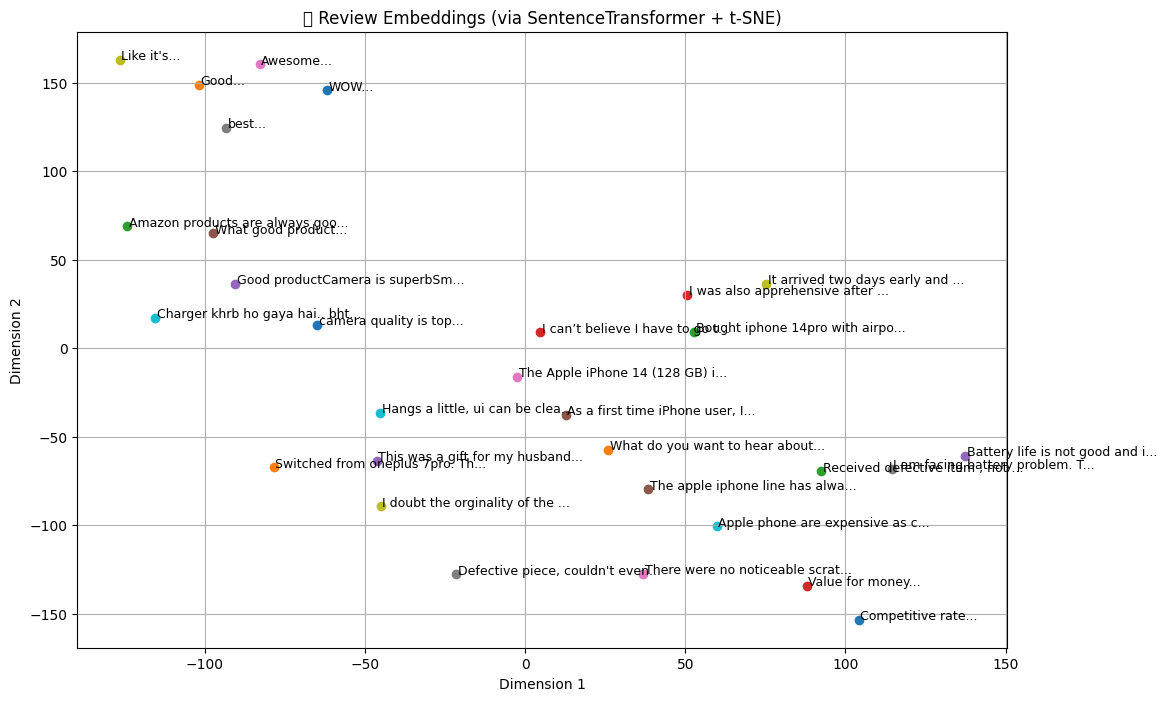

In [23]:
# Install if needed
!pip install sentence-transformers matplotlib scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

#  Load your iPhone dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

#  Clean and sample reviews
df = df.dropna(subset=["reviewDescription"]).reset_index(drop=True)
sample_reviews = df["reviewDescription"].sample(n=30, random_state=42).tolist()  # You can increase n

#  Convert reviews into embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(sample_reviews)

#  Reduce dimensions to 2D for plotting
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

#  Plot embeddings
plt.figure(figsize=(12, 8))
for i, text in enumerate(sample_reviews):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.5, y, text[:30] + "...", fontsize=9)  # Show beginning of review

plt.title("🧠 Review Embeddings (via SentenceTransformer + t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


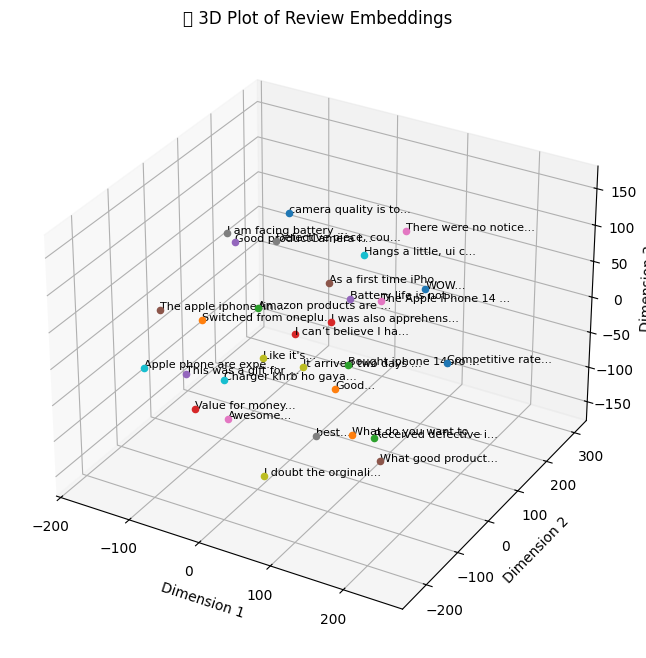

In [24]:
#  Install required libraries if not present
!pip install sentence-transformers matplotlib scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

#  Load dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

#  Clean & sample 30 reviews for visualization
df = df.dropna(subset=["reviewDescription"]).reset_index(drop=True)
sample_reviews = df["reviewDescription"].sample(n=30, random_state=42).tolist()

#  Get embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(sample_reviews)

#  Reduce to 3D
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

#  Plot 3D Embeddings
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, text in enumerate(sample_reviews):
    x, y, z = embeddings_3d[i]
    ax.scatter(x, y, z)
    ax.text(x, y, z, text[:20] + "...", fontsize=8)  # show short snippet

ax.set_title("📌 3D Plot of Review Embeddings")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
plt.show()


In [26]:
#  Install necessary libraries
!pip install diffprivlib scikit-learn --quiet

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from diffprivlib.models import GaussianNB
from sklearn.preprocessing import LabelEncoder


import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv')

#  Clean & preprocess
df = df.dropna(subset=["reviewDescription", "ratingScore"]).reset_index(drop=True)
df.fillna("Unknown", inplace=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

#  Step 1: Privacy Risk Check
print("🔍 Unique review counts (potential privacy leaks):")
rare_reviews = df["reviewDescription"].value_counts().loc[lambda x: x == 1]
print(f" Unique reviews: {len(rare_reviews)} (out of {len(df)})")

print("\n Country distribution:")
print(df["country"].value_counts())

print("\n Variant distribution:")
print(df["variant"].value_counts())

#  Step 2: Convert reviews to TF-IDF + Add Laplace noise
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(df["reviewTitle"] + " " + df["reviewDescription"]).toarray()

def add_laplace_noise(data, sensitivity=1.0, epsilon=1.0):
    noise = np.random.laplace(loc=0.0, scale=sensitivity/epsilon, size=data.shape)
    return data + noise

X_text_noisy = add_laplace_noise(X_text, epsilon=1.0)

# Step 3: Label encode categorical features (optional for richer signal)
for col in ["productAsin", "country", "variant"]:
    df[col] = LabelEncoder().fit_transform(df[col])

X_categorical = df[["productAsin", "country", "isVerified", "variant"]].values
X_combined = np.hstack([X_categorical, X_text_noisy])
y = df["isGood"]

#  Step 4: Train with Differential Privacy
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

dp_model = GaussianNB(epsilon=1.0)
dp_model.fit(X_train, y_train)
accuracy = dp_model.score(X_test, y_test)

#  Results
print(f"\n Accuracy with Differential Privacy (ε=1.0): {accuracy:.2f}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔍 Unique review counts (potential privacy leaks):
 Unique reviews: 1756 (out of 2976)

 Country distribution:
country
India                   2146
United States            576
Japan                    158
United Arab Emirates      80
Mexico                    11
Canada                     4
Egypt                      1
Name: count, dtype: int64

 Variant distribution:
variant
Colour: BlueSize: 128 GB                                  292
Colour: MidnightSize: 128 GB                              236
Colour: StarlightSize: 128 GB                             211
Colour: GreenSize: 128 GB                                 185
Colour: PinkSize: 128 GB                                  179
                                                         ... 
Colour: MidnightSize: 512 GB                                1
Service Provider: VerizonColor: MidnightSize: 256GB       

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "



 Accuracy with Differential Privacy (ε=1.0): 0.66


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/diffprivlib/models/naive_bayes.py:107: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-lea

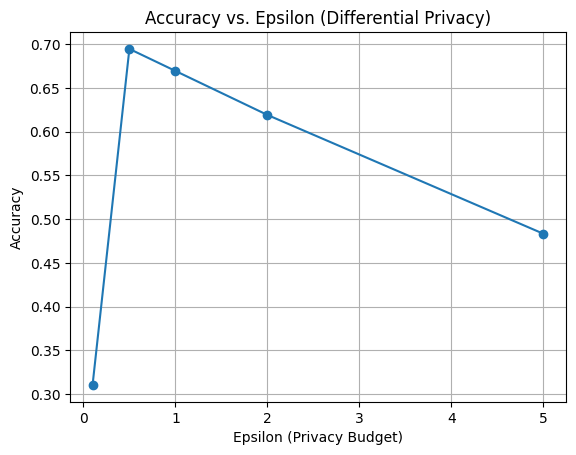

 Accuracy with varying Epsilon (Differential Privacy):
  - Epsilon: 0.1, Accuracy: 0.31
  - Epsilon: 0.5, Accuracy: 0.69
  - Epsilon: 1.0, Accuracy: 0.67
  - Epsilon: 2.0, Accuracy: 0.62
  - Epsilon: 5.0, Accuracy: 0.48


In [28]:
import pandas as pd
from google.colab import drive
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
import numpy as np
import requests
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from diffprivlib.models import GaussianNB
from sklearn.preprocessing import LabelEncoder


#  Step 4: Train with Differential Privacy (with epsilon parameter)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

epsilon_values = [0.1, 0.5, 1.0, 2.0, 5.0]
accuracies = []

for epsilon in epsilon_values:
    dp_model = GaussianNB(epsilon=epsilon)
    dp_model.fit(X_train, y_train)
    accuracy = dp_model.score(X_test, y_test)
    accuracies.append(accuracy)

#  Results
plt.plot(epsilon_values, accuracies, marker='o')
plt.xlabel("Epsilon (Privacy Budget)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epsilon (Differential Privacy)")
plt.grid(True)
plt.show()

print(" Accuracy with varying Epsilon (Differential Privacy):")
for i in range(len(epsilon_values)):
    print(f"  - Epsilon: {epsilon_values[i]:.1f}, Accuracy: {accuracies[i]:.2f}")

In [30]:
# interpret the results

'''

**1. iPhone Review Analysis with SHAP and Embeddings:**

   - **Data Loading and Preprocessing:** The code loads iPhone review data from Google Drive, cleans it (removes missing values), and creates a binary target variable 'isGood' indicating whether a rating is 4 or above.

   - **Sentence Embeddings:** It uses Sentence Transformers to generate embeddings for each review, capturing the semantic meaning of the text.

   - **Classifier Training:** A Random Forest Classifier is trained on these embeddings to predict whether a review is positive or negative based on the textual content.

   - **SHAP Explanations:** SHAP is used to interpret the model's predictions. It highlights which parts of the text (represented by the embeddings) are most influential in determining whether the review is considered positive.

   - **Summary Plots:**  SHAP summary plots show the features (embeddings) with the highest average impact on the prediction. The bar plot in particular displays which features have the highest impact on positive classifications. The other summary plot gives a summary of how these embeddings affect the model's prediction for reviews.

**2. RAG (Retrieval Augmented Generation) for Semantic Search:**

   - **Semantic Search:** Given a user query (e.g., "I want a phone with great camera and battery"), it finds the reviews that are most semantically similar to the query using cosine similarity between the query embedding and the review embeddings.

   - **Review Retrieval:** It retrieves the top-k most similar reviews and displays their rating, variant, and textual content.

**3. Groq LLM Recommendation:**

   - **Contextual Prompt:** It constructs a prompt for a large language model (LLM) using the retrieved similar reviews as context. The prompt asks the LLM to recommend an iPhone based on user needs (e.g., best for camera and battery).

   - **LLM-based Recommendation:** It sends the prompt to the Groq LLM API and receives a response with a recommended iPhone variant and its rationale based on the context.

**4. Ethical Bias Check with SHAP:**

   - **Sensitive Features:** It identifies potential sensitive features (e.g., country, variant) to check if the model's predictions are biased.

   - **SHAP Analysis:** It uses SHAP values to visualize the impact of these sensitive features on the model's prediction for positive reviews.

   - **Impact Check:**  It analyzes whether these features have a high average impact on the prediction, which could indicate potential bias. The boxplots provide a visualization of the distribution of SHAP values for sensitive features, highlighting the potential issue.


**5. Differential Privacy for Review Analysis:**

   - **Privacy Risk Assessment:** It checks for privacy risks, specifically the existence of unique reviews (only appearing once), which could potentially reveal information about individual users.

   - **Laplace Noise:** It converts the reviews to TF-IDF (term frequency-inverse document frequency) representations to capture their textual content and then applies Laplace noise to the TF-IDF features. This adds randomness to the data, protecting individual review content.

   - **Differential Privacy Training:** It trains a Naive Bayes classifier (specifically, a differentially private version) on the dataset. This classifier is designed to protect the privacy of individual data points while still providing reasonable accuracy. It trains the classifier with different `epsilon` values (privacy budget).


**Interpretation of Results:**

- **SHAP:** You can see which features or embedding dimensions are most important for predicting the outcome (good or bad review). This helps understand which parts of a review text are the most influential.
- **RAG:** The model retrieves reviews relevant to user queries, potentially helping users discover informative and useful reviews related to specific needs or features.
- **Groq LLM:** The LLM generates recommendations for iPhones based on the context provided. This demonstrates that the retrieved reviews can support relevant and helpful recommendations.
- **Ethical Bias Check:** The SHAP analysis provides insights into whether the model is exhibiting bias based on sensitive attributes (e.g., if certain phone variants or countries are more associated with positive reviews).
- **Differential Privacy:** By adding Laplace noise and training with differentially private classifiers, you can improve the privacy of individual reviews without severely impacting the accuracy of the model.


**Output Interpretation**

The code does many things and will produce:

1. **SHAP Explanations:**
   - SHAP plots showing feature importance (embeddings) for predicting whether a review is positive.

2. **RAG Results:**
   - A list of the most relevant reviews to the query, showing their rating, variant, and content.

3. **Groq LLM Response:**
   - An iPhone recommendation based on the retrieved reviews and the user's need (e.g., camera and battery).

4. **Ethical Bias Check:**
   - Boxplots or other visualizations showing how sensitive features (e.g., country) influence SHAP values for positive reviews.
   - A list of top features by importance.
   - A summary reporting if any sensitive features are highly influential, which could raise concerns about bias.

5. **Differential Privacy Results:**
   - Report of unique reviews (potential privacy leaks).
   - Accuracy with varying epsilon levels.
   - A graph plotting the relationship between the epsilon value and the model's accuracy.


**Key Takeaways:**
- This code demonstrates how to build a recommendation system with review analysis.
- It utilizes embedding-based approaches and explainability techniques to understand model predictions.
- It incorporates techniques for ensuring data privacy (differential privacy) and fairness (ethical bias check).
'''

'\n\n**1. iPhone Review Analysis with SHAP and Embeddings:**\n\n   - **Data Loading and Preprocessing:** The code loads iPhone review data from Google Drive, cleans it (removes missing values), and creates a binary target variable \'isGood\' indicating whether a rating is 4 or above.\n\n   - **Sentence Embeddings:** It uses Sentence Transformers to generate embeddings for each review, capturing the semantic meaning of the text.\n\n   - **Classifier Training:** A Random Forest Classifier is trained on these embeddings to predict whether a review is positive or negative based on the textual content.\n\n   - **SHAP Explanations:** SHAP is used to interpret the model\'s predictions. It highlights which parts of the text (represented by the embeddings) are most influential in determining whether the review is considered positive.\n\n   - **Summary Plots:**  SHAP summary plots show the features (embeddings) with the highest average impact on the prediction. The bar plot in particular display

In [31]:
#  Install LIME if not already installed
!pip install lime --quiet

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import lime.lime_tabular

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

#  Clean data
df = df.dropna(subset=["reviewDescription", "ratingScore"]).reset_index(drop=True)
df.fillna("Unknown", inplace=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

#  TF-IDF text features
tfidf = TfidfVectorizer(max_features=100)
X_text = tfidf.fit_transform(df["reviewTitle"] + " " + df["reviewDescription"]).toarray()

# Encode categorical features
for col in ["productAsin", "country", "variant"]:
    df[col] = LabelEncoder().fit_transform(df[col])

X_cat = df[["productAsin", "country", "isVerified", "variant"]].values
X_combined = np.hstack([X_cat, X_text])
y = df["isGood"]
feature_names = ["productAsin", "country", "isVerified", "variant"] + [f"text_{i}" for i in range(X_text.shape[1])]

#  Train model
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#  LIME Explanation
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=["Bad", "Good"],
    mode="classification"
)

# Select a random instance to explain
instance_index = np.random.randint(0, X_test.shape[0])
instance = X_test[instance_index]

# Explain prediction
lime_exp = lime_explainer.explain_instance(instance, model.predict_proba, num_features=10)

# Display LIME explanation
print(f"Explaining instance #{instance_index}")
lime_exp.show_in_notebook()


Explaining instance #428


In [33]:
!pip install aif360 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 2.8 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 3.1 MB/s eta 0:00:00
📊 Selection Rate by Country (encoded):
                 selection_rate
country_encoded                
1                       1.00000
2                       0.98928
3                       1.00000
4                       1.00000
5                       1.00000
6                       1.00000

📉 Demographic Parity Difference:
0.01071975497702915


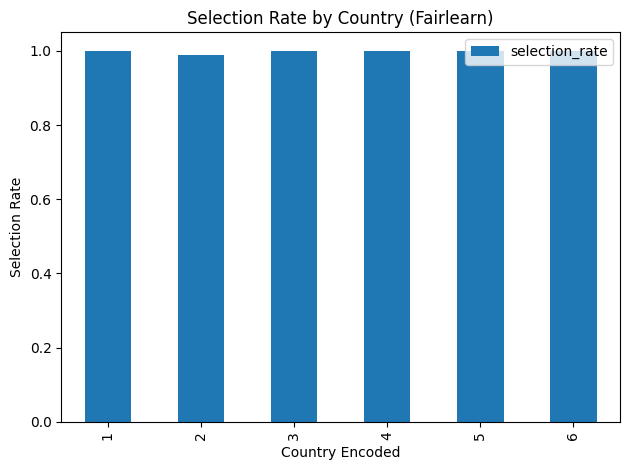

In [36]:
# Install fairlearn instead of aif360
!pip install fairlearn pandas scikit-learn matplotlib --quiet

# Import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from fairlearn.metrics import MetricFrame, selection_rate, demographic_parity_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

# Drop rows with missing data
df = df.dropna(subset=["ratingScore", "country", "reviewDescription"]).reset_index(drop=True)

# Binary classification label: 1 = Good (rating >= 4), 0 = Not good
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

# Encode categorical columns
le_country = LabelEncoder()
df["country_encoded"] = le_country.fit_transform(df["country"])

# Text length as a simple feature (can be replaced with TF-IDF/embedding)
df["text_length"] = df["reviewDescription"].apply(lambda x: len(str(x)))

# Features and label
X = df[["text_length"]]  # simple feature for demo
y = df["isGood"]
A = df["country_encoded"]  # sensitive feature

# Split
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.3, random_state=42)

# Fairlearn: Train fair model
estimator = LogisticRegression(solver="liblinear")
constraint = DemographicParity()
mitigator = ExponentiatedGradient(estimator, constraint)
mitigator.fit(X_train, y_train, sensitive_features=A_train)

# Predict
y_pred = mitigator.predict(X_test)

# Evaluate fairness
metric_frame = MetricFrame(
    metrics={"selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=A_test
)

# Show disparity
print("📊 Selection Rate by Country (encoded):")
print(metric_frame.by_group)
print("\n📉 Demographic Parity Difference:")
print(demographic_parity_difference(y_test, y_pred, sensitive_features=A_test))

# Plot selection rate
metric_frame.by_group.plot.bar(title="Selection Rate by Country (Fairlearn)", ylabel="Selection Rate", xlabel="Country Encoded")
plt.tight_layout()
plt.show()


In [44]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

# Preprocess
df = df.dropna(subset=["reviewDescription", "ratingScore", "variant"]).reset_index(drop=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

# Only use verified reviews with rating >= 4
df = df[df["isGood"] == 1]
df = df[df["isVerified"] == True] if "isVerified" in df.columns else df

# Embed the reviews
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(df["reviewDescription"].tolist(), show_progress_bar=True)

# Simulate user query
query = "I want a phone with excellent battery and camera"
query_embedding = model.encode([query])
similarities = cosine_similarity(query_embedding, embeddings)[0]

# Get top-k similar reviews
top_k = 5
top_indices = np.argsort(similarities)[-top_k:][::-1]
recommended = df.iloc[top_indices][["variant", "ratingScore", "reviewDescription"]]



Batches:   0%|          | 0/60 [00:00<?, ?it/s]

In [40]:


#
print("Recommended iPhone Variants based on your query:")
for index, row in recommended.iterrows():
  print(f"\nVariant: {row['variant']}")
  print(f"Rating: {row['ratingScore']}")
  print(f"Review: {row['reviewDescription'][:100]}...")  # Show a snippet of the review


Recommended iPhone Variants based on your query:

Variant: Colour: GreenSize: 128 GB
Rating: 5
Review: Very good phone and camera is awesome but battery is very weak...

Variant: Colour: GreenSize: 128 GB
Rating: 5
Review: Very good phone and camera is awesome but battery is very weak...

Variant: Colour: PurpleSize: 128 GB
Rating: 4
Review: Amazing phone with amazing camera* must buy one...

Variant: Service Provider: UnlockedColor: MidnightSize: 256GB
Rating: 5
Review: I like this phone. Battery health is good, cameras are good. Easy and comfortable to use...

Variant: Colour: (PRODUCT) REDSize: 256 GB
Rating: 5
Review: Everything about this phone is best♥️GREAT BATTERY 🔋GREAT CAMERA 📸GREAT DESIGN♥️...


📊 Selection Rate by Country (Standard Model):
                 selection_rate
country_encoded                
1                       1.00000
2                       0.98928
3                       1.00000
4                       1.00000
5                       1.00000
6                       1.00000

📉 Demographic Parity Difference (Standard Model):
0.01071975497702915

📊 Selection Rate by Country (Fair Model):
                 selection_rate
country_encoded                
1                       1.00000
2                       0.98928
3                       1.00000
4                       1.00000
5                       1.00000
6                       1.00000

📉 Demographic Parity Difference (Fair Model):
0.01071975497702915

Comparison:
- Standard Model DP Difference: 0.0107
- Fair Model DP Difference: 0.0107


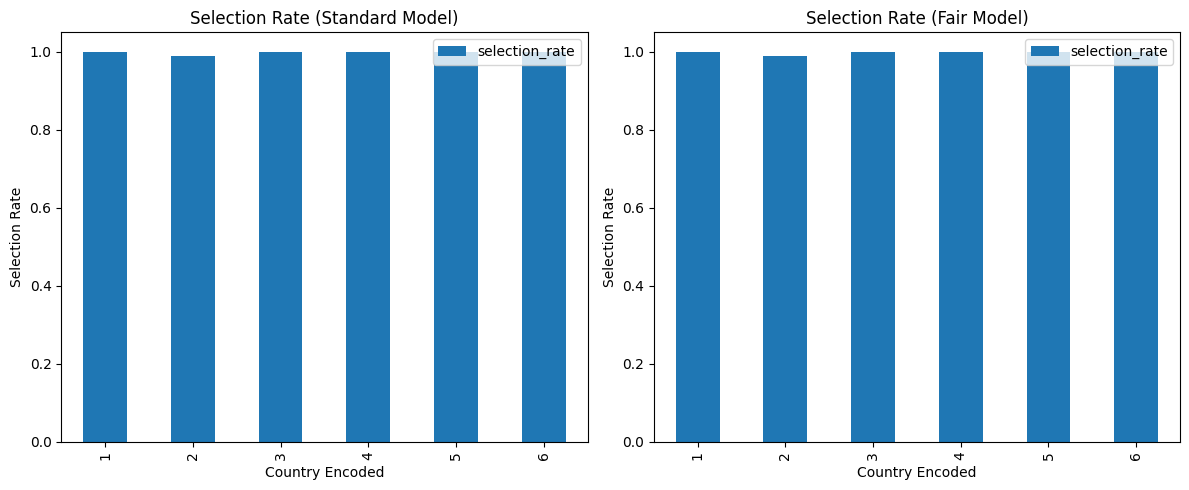

In [41]:
# compare fairness results and non fairnesss results

import pandas as pd
import matplotlib.pyplot as plt
# Install fairlearn if needed
!pip install fairlearn --quiet

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

# Preprocess
df = df.dropna(subset=["reviewDescription", "ratingScore", "country"]).reset_index(drop=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

# Encode country (sensitive feature)
le_country = LabelEncoder()
df["country_encoded"] = le_country.fit_transform(df["country"])

# Text length as a feature (you can replace with embeddings)
df["text_length"] = df["reviewDescription"].apply(lambda x: len(str(x)))

# Features, label, and sensitive attribute
X = df[["text_length"]]
y = df["isGood"]
A = df["country_encoded"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.3, random_state=42)

# Train a standard model (Logistic Regression)
standard_model = LogisticRegression(solver="liblinear")
standard_model.fit(X_train, y_train)
y_pred_standard = standard_model.predict(X_test)

# Evaluate fairness of the standard model
metric_frame_standard = MetricFrame(
    metrics={"selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_standard,
    sensitive_features=A_test
)

# Print selection rates for the standard model
print(" Selection Rate by Country (Standard Model):")
print(metric_frame_standard.by_group)

# Calculate and print the demographic parity difference for the standard model
print("\n📉 Demographic Parity Difference (Standard Model):")
dp_diff_standard = demographic_parity_difference(y_test, y_pred_standard, sensitive_features=A_test)
print(dp_diff_standard)


# Train a fair model with fairlearn
estimator = LogisticRegression(solver="liblinear")
constraint = DemographicParity()
mitigator = ExponentiatedGradient(estimator, constraint)
mitigator.fit(X_train, y_train, sensitive_features=A_train)

# Predict with the fair model
y_pred_fair = mitigator.predict(X_test)

# Evaluate fairness of the fair model
metric_frame_fair = MetricFrame(
    metrics={"selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=A_test
)

# Print selection rates for the fair model
print("\n Selection Rate by Country (Fair Model):")
print(metric_frame_fair.by_group)

# Calculate and print the demographic parity difference for the fair model
print("\n Demographic Parity Difference (Fair Model):")
dp_diff_fair = demographic_parity_difference(y_test, y_pred_fair, sensitive_features=A_test)
print(dp_diff_fair)


# Compare the two models
print("\nComparison:")
print(f"- Standard Model DP Difference: {dp_diff_standard:.4f}")
print(f"- Fair Model DP Difference: {dp_diff_fair:.4f}")

# Plot selection rates for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
metric_frame_standard.by_group.plot.bar(title="Selection Rate (Standard Model)", ylabel="Selection Rate", xlabel="Country Encoded", ax=axes[0])
metric_frame_fair.by_group.plot.bar(title="Selection Rate (Fair Model)", ylabel="Selection Rate", xlabel="Country Encoded", ax=axes[1])
plt.tight_layout()
plt.show()


In [43]:
#  variant field and do the comparision

import pandas as pd
# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

# Preprocess
df = df.dropna(subset=["reviewDescription", "ratingScore", "variant"]).reset_index(drop=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

# Only use verified reviews with rating >= 4
df = df[df["isGood"] == 1]
df = df[df["isVerified"] == True] if "isVerified" in df.columns else df


# Find unique variants
unique_variants = df["variant"].unique()


# Example comparison: Find reviews for a specific variant
target_variant = "Colour: GreenSize: 128 GB"  # Replace with the variant you want to compare

if target_variant in unique_variants:
  # Filter reviews for the target variant
  reviews_for_variant = df[df["variant"] == target_variant]

  # You can now analyze reviews_for_variant, such as calculating average ratings or looking at sentiment.

  print(f"Reviews for {target_variant}:")
  print(reviews_for_variant[["reviewDescription", "ratingScore"]].head())
else:
  print(f"Variant '{target_variant}' not found in the dataset.")


Reviews for Colour: GreenSize: 128 GB:
                                    reviewDescription  ratingScore
58                                               Nice            4
59  Very happy with the purchase, product is genui...            5
60                                    Value for money            5
61                                  No 1 Mobile phone            5
62  although, i-phone handling is quite different ...            5


 Selection Rate by Variant (Standard Model):
                 selection_rate
variant_encoded                
0                      0.978261
1                      1.000000
2                      1.000000
3                      1.000000
4                      0.988095
...                         ...
78                     1.000000
79                     1.000000
80                     1.000000
82                     1.000000
85                     1.000000

[66 rows x 1 columns]

 Demographic Parity Difference (Standard Model):
0.04081632653061229

 Selection Rate by Variant (Fair Model):
                 selection_rate
variant_encoded                
0                      0.978261
1                      1.000000
2                      1.000000
3                      0.888889
4                      0.952381
...                         ...
78                     1.000000
79                     1.000000
80                     1.000000
82                     1.000000
85                  

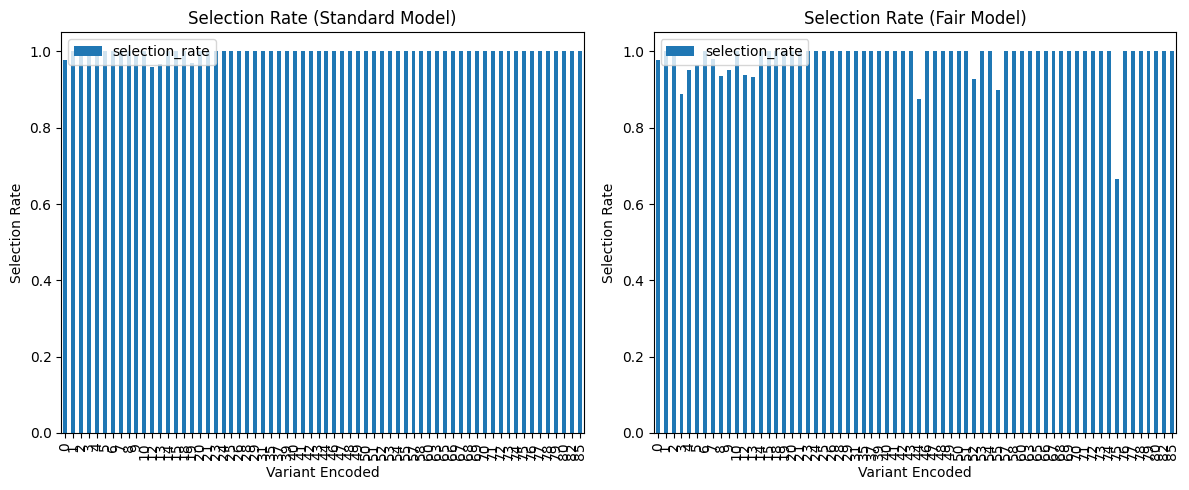

In [45]:
# apply fairness  to variant field and do the comparision

import pandas as pd
import matplotlib.pyplot as plt


#  variant field and do the comparision

# Load the dataset
file_path = "/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv"
df = pd.read_csv(file_path)

# Preprocess
df = df.dropna(subset=["reviewDescription", "ratingScore", "variant"]).reset_index(drop=True)
df["isGood"] = (df["ratingScore"] >= 4).astype(int)

# Encode variant (sensitive feature)
le_variant = LabelEncoder()
df["variant_encoded"] = le_variant.fit_transform(df["variant"])

# Text length as a feature (you can replace with embeddings)
df["text_length"] = df["reviewDescription"].apply(lambda x: len(str(x)))

# Features, label, and sensitive attribute
X = df[["text_length"]]
y = df["isGood"]
A = df["variant_encoded"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, y, A, test_size=0.3, random_state=42)

# Train a standard model (Logistic Regression)
standard_model = LogisticRegression(solver="liblinear")
standard_model.fit(X_train, y_train)
y_pred_standard = standard_model.predict(X_test)

# Evaluate fairness of the standard model
metric_frame_standard = MetricFrame(
    metrics={"selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_standard,
    sensitive_features=A_test
)

# Print selection rates for the standard model
print(" Selection Rate by Variant (Standard Model):")
print(metric_frame_standard.by_group)

# Calculate and print the demographic parity difference for the standard model
print("\n Demographic Parity Difference (Standard Model):")
dp_diff_standard = demographic_parity_difference(y_test, y_pred_standard, sensitive_features=A_test)
print(dp_diff_standard)


# Train a fair model with fairlearn
estimator = LogisticRegression(solver="liblinear")
constraint = DemographicParity()
mitigator = ExponentiatedGradient(estimator, constraint)
mitigator.fit(X_train, y_train, sensitive_features=A_train)

# Predict with the fair model
y_pred_fair = mitigator.predict(X_test)

# Evaluate fairness of the fair model
metric_frame_fair = MetricFrame(
    metrics={"selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_fair,
    sensitive_features=A_test
)

# Print selection rates for the fair model
print("\n Selection Rate by Variant (Fair Model):")
print(metric_frame_fair.by_group)

# Calculate and print the demographic parity difference for the fair model
print("\n Demographic Parity Difference (Fair Model):")
dp_diff_fair = demographic_parity_difference(y_test, y_pred_fair, sensitive_features=A_test)
print(dp_diff_fair)


# Compare the two models
print("\nComparison:")
print(f"- Standard Model DP Difference: {dp_diff_standard:.4f}")
print(f"- Fair Model DP Difference: {dp_diff_fair:.4f}")

# Plot selection rates for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
metric_frame_standard.by_group.plot.bar(title="Selection Rate (Standard Model)", ylabel="Selection Rate", xlabel="Variant Encoded", ax=axes[0])
metric_frame_fair.by_group.plot.bar(title="Selection Rate (Fair Model)", ylabel="Selection Rate", xlabel="Variant Encoded", ax=axes[1])
plt.tight_layout()
plt.show()


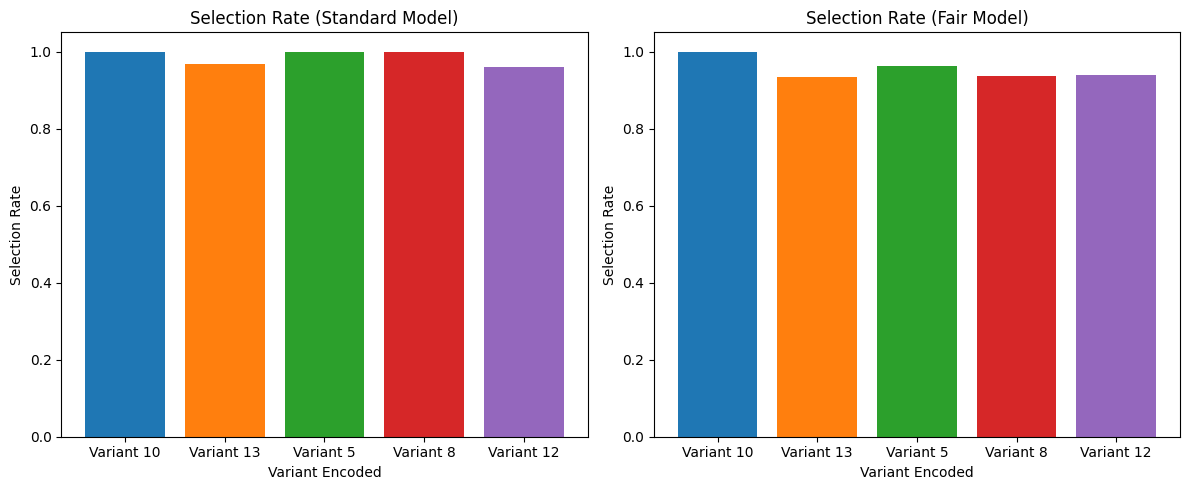

In [47]:
# plot few variant encoded values for both

import matplotlib.pyplot as plt
# ... (Your existing code) ...

# Assuming you have 'variant_encoded' from previous code

# Select a few encoded variant values for visualization
num_variants_to_plot = 5  # Choose how many variants to plot
selected_variants = df["variant_encoded"].unique()[:num_variants_to_plot]

# Create separate plots for standard and fair model
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot selection rate for the standard model for selected variants
for variant in selected_variants:
  selection_rate_variant = metric_frame_standard.by_group[metric_frame_standard.by_group.index == variant]["selection_rate"]
  if not selection_rate_variant.empty:
    axes[0].bar(f"Variant {variant}", selection_rate_variant.values[0])

axes[0].set_title("Selection Rate (Standard Model)")
axes[0].set_ylabel("Selection Rate")
axes[0].set_xlabel("Variant Encoded")

# Plot selection rate for the fair model for selected variants
for variant in selected_variants:
  selection_rate_variant = metric_frame_fair.by_group[metric_frame_fair.by_group.index == variant]["selection_rate"]
  if not selection_rate_variant.empty:
    axes[1].bar(f"Variant {variant}", selection_rate_variant.values[0])

axes[1].set_title("Selection Rate (Fair Model)")
axes[1].set_ylabel("Selection Rate")
axes[1].set_xlabel("Variant Encoded")


plt.tight_layout()
plt.show()
